# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

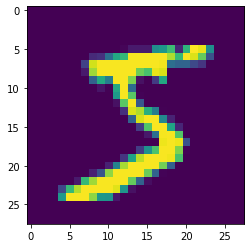

In [8]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

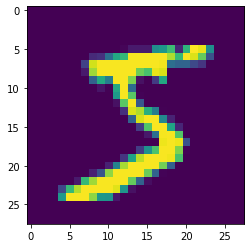

In [24]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Flatten, concatenate, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=2)

In [73]:
model = Sequential(name = 'base_cnn')

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [100]:
def build_model(lr = 0.0, lr_d = 0.0, dr = 0.0):
    x = Input(shape = (28, 28, 1))
    conv = Conv2D(32, kernel_size=(4, 4), activation='relu')(x)
    
    max_pool = MaxPooling2D(pool_size=(2, 2))(conv)
    avg_pool = AveragePooling2D(pool_size=(2, 2))(conv)
       
    y = concatenate([max_pool, avg_pool])
    y = Flatten()(y)
    y = Dropout(dr)(Dense(32, activation='relu')(y))
    y = Dense(10, activation = 'softmax')(y)
    
    model = Model(inputs = x, outputs = y, name = 'comb_local')
    opt = tf.keras.optimizers.Adam(lr = lr, decay = lr_d)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [111]:
def build_model(lr = 0.0, lr_d = 0.0, dr = 0.0):
    x = Input(shape = (28, 28, 1))
    conv = Conv2D(32, kernel_size=(4, 4), activation='relu')(x)
    
    max_pool = GlobalMaxPooling2D()(conv)
    avg_pool = GlobalAveragePooling2D()(conv)
    
    y = concatenate([max_pool, avg_pool])
    y = Dropout(dr)(Dense(32, activation='relu')(y))
    y = Dense(10, activation = 'softmax')(y)
    
    model = Model(inputs = x, outputs = y, name = 'comb_global')
    opt = tf.keras.optimizers.Adam(lr = lr, decay = lr_d)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [112]:
model = build_model(lr = 0.001, lr_d = 0, dr = 0.3)

In [113]:
model.summary()

Model: "comb_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 25, 25, 32)   544         input_10[0][0]                   
__________________________________________________________________________________________________
global_max_pooling2d_2 (GlobalM (None, 32)           0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
global_average_pooling2d_2 (Glo (None, 32)           0           conv2d_14[0][0]                  
_____________________________________________________________________________________________

## Train the Model

In [114]:
model.fit(x_train,y_cat_train,
          validation_data=(x_test,y_cat_test),
          batch_size = 128, epochs=30,
          callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 51s 847us/sample - loss: 1.7350 - accuracy: 0.4514 - val_loss: 1.1588 - val_accuracy: 0.6463
Epoch 2/30
60000/60000 [==============================] - 51s 848us/sample - loss: 0.9473 - accuracy: 0.6981 - val_loss: 0.7593 - val_accuracy: 0.7613
Epoch 3/30
60000/60000 [==============================] - 51s 854us/sample - loss: 0.7128 - accuracy: 0.7681 - val_loss: 0.6282 - val_accuracy: 0.7921
Epoch 4/30
60000/60000 [==============================] - 51s 855us/sample - loss: 0.6106 - accuracy: 0.8027 - val_loss: 0.5518 - val_accuracy: 0.8158
Epoch 5/30
60000/60000 [==============================] - 52s 866us/sample - loss: 0.5424 - accuracy: 0.8237 - val_loss: 0.4915 - val_accuracy: 0.8381
Epoch 6/30
60000/60000 [==============================] - 51s 854us/sample - loss: 0.4940 - accuracy: 0.8399 - val_loss: 0.4478 - val_accuracy: 0.8580
Epoch 7/30
60000/60000 [====================

## Evaluate the Model

In [107]:
model.metrics_names

['loss', 'accuracy']

In [108]:
losses = pd.DataFrame(model.history.history)

In [109]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.805213,0.456583,1.175009,0.6700
1,0.925437,0.724700,0.745996,0.7719
2,0.693832,0.782600,0.610531,0.8115
3,0.612711,0.801583,0.552549,0.8236
4,0.563315,0.817317,0.512638,0.8361


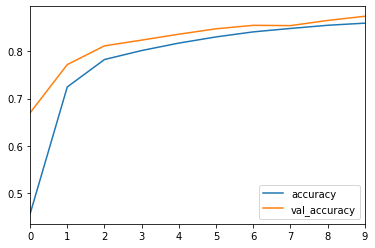

In [110]:
losses[['accuracy','val_accuracy']].plot()

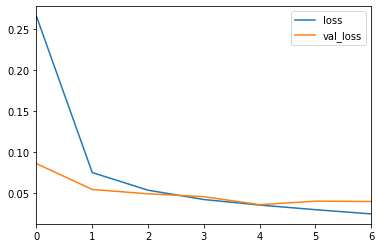

In [91]:
losses[['loss','val_loss']].plot()

In [92]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test, verbose=0))

['loss', 'accuracy']
[0.04002102059809258, 0.9872]


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
predictions = model.predict_classes(x_test, batch_size = 1024)

In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [54]:
predictions[0]

7

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[ 972,    0,    1,    1,    0,    1,    4,    0,    1,    0],
       [   0, 1128,    0,    2,    0,    2,    1,    0,    2,    0],
       [   3,    0, 1013,    6,    0,    0,    4,    4,    2,    0],
       [   0,    0,    0, 1002,    0,    5,    0,    0,    3,    0],
       [   2,    0,    0,    0,  958,    0,    4,    0,    2,   16],
       [   0,    0,    0,    4,    0,  886,    2,    0,    0,    0],
       [   2,    2,    0,    1,    1,    2,  948,    0,    2,    0],
       [   0,    1,    3,    1,    0,    1,    0, 1014,    2,    6],
       [   2,    0,    2,    1,    1,    2,    1,    2,  957,    6],
       [   2,    0,    0,    1,    1,    6,    0,    1,    1,  997]],
      dtype=int64)

In [58]:
import seaborn as sns

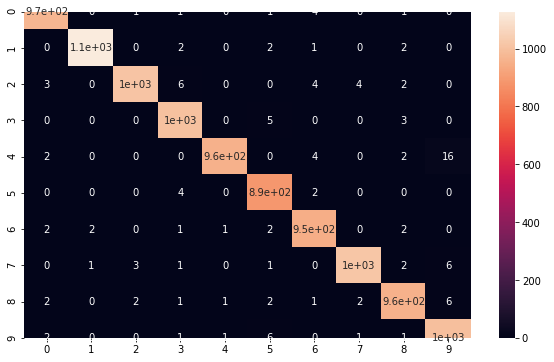

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [60]:
my_number = x_test[0]

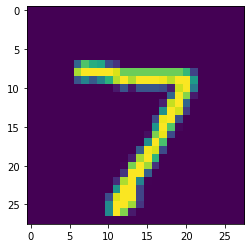

In [61]:
plt.imshow(my_number.reshape(28,28))

In [62]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)